In [521]:
%reload_ext autoreload
%autoreload 2

In [522]:
import numpy as np
import matplotlib.pyplot as plt

In [523]:
import sys
sys.path.append('../../modules')

import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from env.gridworld import GridWorldWithWallsAndTraps
from policy import EpsilonGreedyPolicy
from algo.dp import PolicyIteration
from algo.planning import DynaQ, DynaQPlus

In [534]:
grid_type_array = np.array([[4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

reward_array_1 = np.array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])
reward_array_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]])

In [535]:
env_1 = GridWorldWithWallsAndTraps(
    grid_type_array,
    reward_array_1,
    int_to_action_dict={0:'left', 1:'right'},
    num_actions=2
)

env_2 = GridWorldWithWallsAndTraps(
    grid_type_array,
    reward_array_2,
    int_to_action_dict={0:'left', 1:'right'},
    num_actions=2
)

In [558]:
policy = EpsilonGreedyPolicy(q=np.zeros(env_1.action_space_shape), epsilon=0)

algo = PolicyIteration(
    env=env_1, policy=policy, 
    discount_factor=1,
    truncate_pe=True, pe_tol=None,
    conv_tol=1e-16
)
algo.run(max_iterations=1000, which_tqdm='notebook')

def get_next_state(s, a):
    if a == 0:
        s_prime = (s[0], s[1] - 1)
    elif a == 1:
        s_prime = (s[0], s[1] + 1)
    return s_prime

tau = np.zeros((11, 2))
old_q = algo.q.copy()
trajectory_lengths = []
for i in range(10000):
    
    trajectory, tau = algo.sample_greedy_trajectory(old_q, tau)
    state_ixs = [s[1] for s, a in trajectory]
    trajectory_lengths.append(np.max(state_ixs))

Running DP policy iteration for at most 1000 iterations ...


Result: Convergence reached at iteration 12


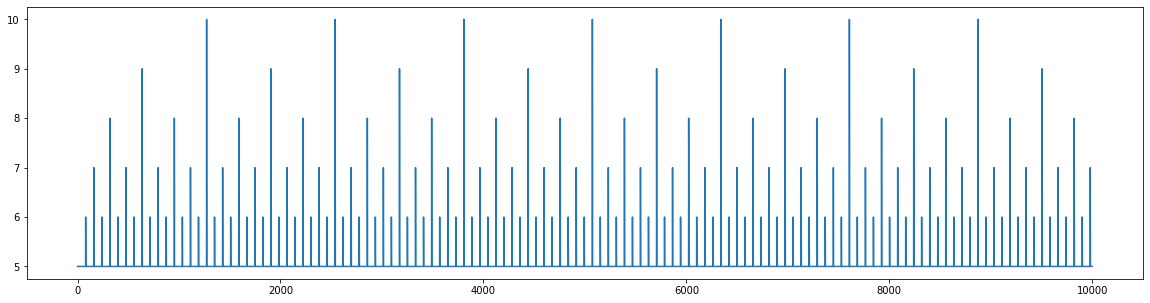

In [559]:
plt.figure(figsize=(20, 5))
plt.plot(trajectory_lengths)
plt.show()

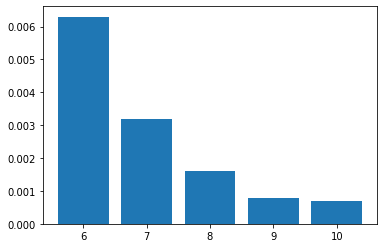

In [560]:
plt.bar([6, 7, 8, 9, 10], np.bincount(trajectory_lengths)[6:] / len(trajectory_lengths))
plt.show()